<Strong> Reading in the data </Strong>

In [261]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [262]:

from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import optimizers
from tensorflow.keras import optimizers


# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

<Strong> train data = reviews (indx's of words) , train labels = 0/1 1 = positive class (positive)</Strong>

<Strong> Training and Test have 25000 Examples each. </Strong>

In [263]:
print(train_labels[0])
print(train_data[1])

1
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


<Strong> Word for each index .</Strong>

In [264]:
word_index = imdb.get_word_index()

for key, value in word_index.items():
    if 1 == value:
        print (key)

the


<Strong> Have to Change to <i>Tensors</i> to feed to Network </Strong>

In [265]:
def vectorize_sequences(sequences, dimension=10000):
    
    # List with 25,000 Rows and 10,000 Columns (Max no. of words)
    results = np.zeros((len(sequences), dimension))
    
    #enum and each review (0,[1,2,3,1,23,...])
    for i, sequence in enumerate(sequences):
        
        #Sets specific indices of results[i] to 1 (indices of each sequence (columns of matrix))
        results[i, sequence] = 1.
                
    return results

In [266]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

<Strong> Converting labels (y) to an array (floats). </Strong>

In [267]:
y_train = np.asarray(train_labels).astype('float32')
y_test = test_labels.astype('float32')

In [268]:
x_train.shape

(25000, 10000)

<p>
A type of network that performs well on such a problem is a simple stack of fully connected (Dense) layers with relu activations: Dense(16, activation='relu').
</p>


<Strong> Sigmoid as we are using classification with two options , so if neg produces results (0,1)

In [269]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

<Strong> Loss Func is Log Loss (binary_crossentropy) , error = accuracy (no.correct predics / all predics) , optimizer = like g.d </Strong></Strong>

In [270]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

<Strong> Setting aside 10,000 examples for testing on unseen data , using for hyper-parameter selection. </Strong>

In [271]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

<p> After every batch (512), calculate the average loss for the batch (Performance L(yˆ, y) = How much ˆy differs from the true y). Goal of the optimizer is to optimize the loss function (find the best values for ) Calulate the gradient for each example in batch , then average for all 512  </p>

In [272]:
epoch = 5
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epoch,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 1s 31ms/step - loss: 0.5113 - accuracy: 0.7943 - val_loss: 0.3883 - val_accuracy: 0.8738
Epoch 2/5
30/30 [==============================] - 0s 16ms/step - loss: 0.3072 - accuracy: 0.9031 - val_loss: 0.3199 - val_accuracy: 0.8771
Epoch 3/5
30/30 [==============================] - 0s 16ms/step - loss: 0.2276 - accuracy: 0.9271 - val_loss: 0.2860 - val_accuracy: 0.8878
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1806 - accuracy: 0.9417 - val_loss: 0.2737 - val_accuracy: 0.8916
Epoch 5/5
30/30 [==============================] - 0s 16ms/step - loss: 0.1477 - accuracy: 0.9521 - val_loss: 0.2877 - val_accuracy: 0.8855


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


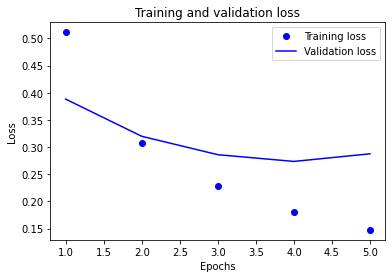

In [273]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, epoch + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

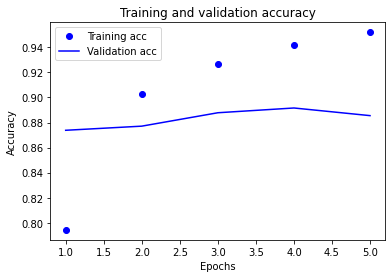

In [277]:
training_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.clf() 
plt.plot(epochs, training_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Strong> Final Results </Strong>

In [279]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3125 - accuracy: 0.8746


array([[0.20500097],
       [0.99797916],
       [0.8444837 ],
       ...,
       [0.06203622],
       [0.10679251],
       [0.4179142 ]], dtype=float32)

<Strong> Predicting if reviews to be Positive </Strong>

In [280]:
model.predict(x_test)

array([[0.20500097],
       [0.99797916],
       [0.8444837 ],
       ...,
       [0.06203622],
       [0.10679251],
       [0.4179142 ]], dtype=float32)